<center><h1>Fake News Detection using Machine Learning</h1></center>

#### Objective of the Project

The main objective of this project is to build a machine learning model that can automatically classify news articles as either reliable (label = 0) or unreliable (label = 1) based on features such as the title, author, and text content of the articles. The ultimate goal is to help detect fake news more accurately by analyzing the patterns in the dataset.

####  Project Workflow

1. First of all, we have collected data from kaggle 
2. Then, we will peform **Data Preprocessing**. In this process, we will clean the data, handle missing values, tokenize the text.
3. After that we will perform **feature Engineering** where we  transform text data into numerical.
4. In the model we will use **Logistic Regression** because it well-suited for binary classification tasks. Furthermore it is simple, interpretable, and effective on structured data.
5. At last we will evalute our model and deploy it.

##### Importing libraries

In [1]:
!pip install nltk

In [2]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SWETA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

* Stopwords are commonly removed from text data during preprocessing in natural language processing (NLP) because they often do not add much value in terms of meaning or sentiment (e.g., words like "is," "the," "and"). 

##### LOADING DATASET

In [5]:
news = pd.read_csv('train.csv')

In [6]:
news.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [7]:
news.shape

(20800, 5)

1. 20,800 rows: representing individual data records or entries.
2. 5 columns: representing different features or attributes of the data

### checking the Null values

In [8]:
news.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In our dataset, there are 558 missing values in the 'title' column, 1,957 missing values in the 'author' column, and 39 missing values in the 'text' column.

In [9]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


The id and label columns are complete with no missing values, while the title column has 558 missing entries, the author column has 1,957 missing entries, and the text column has 39 missing entries. The id and label columns are of data type int64, while the title, author, and text columns are of data type object. Overall, the DataFrame occupies 812.6 KB of memory, indicating efficient data storage despite some missing values.








In [10]:
# replacing the null values with empty string

In [11]:
news['label'].value_counts()

label
1    10413
0    10387
Name: count, dtype: int64

In [12]:
news = news.fillna('')

In [13]:
news['content'] = news['author']+ news['title']

In [14]:
print(news['content'])

0        Darrell LucusHouse Dem Aide: We Didn’t Even Se...
1        Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom...
2        Consortiumnews.comWhy the Truth Might Get You ...
3        Jessica Purkiss15 Civilians Killed In Single U...
4        Howard PortnoyIranian woman jailed for fiction...
                               ...                        
20795    Jerome HudsonRapper T.I.: Trump a ’Poster Chil...
20796    Benjamin HoffmanN.F.L. Playoffs: Schedule, Mat...
20797    Michael J. de la Merced and Rachel AbramsMacy’...
20798    Alex AnsaryNATO, Russia To Hold Parallel Exerc...
20799               David SwansonWhat Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [15]:
#separating the data level
X = news.drop(columns = 'label', axis =1)
Y = news['label']

In [16]:
news.describe().T

,count,mean,std,min,25%,50%,75%,max
id,20800.0,10399.500000,6004.587135,0.0,5199.75,10399.5,15599.25,20799.0
label,20800.0,0.500625,0.500012,0.0,0.00,1.0,1.00,1.0


In [17]:
news.describe(include=[object]).T

,count,unique,top,freq
title,20800,19804,,558
author,20800,4202,,1957
text,20800,20387,,75
content,20800,20412,Anonymous,61


In [18]:
print(X)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

In [19]:
Y = news['label']

In [20]:
print(Y)

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64


## Data preprocessing

In machine learning (ML) and natural language processing (NLP), **stemming** is a process used to reduce a word to its root form or base form. The idea is to strip the word of any suffixes or prefixes that may alter its grammatical form without changing its underlying meaning. This helps reduce dimensionality and improve model efficiency, especially in text-related tasks like classification or clustering.

For example, the words "running," "runner," and "ran" can all be reduced to their stem, "run," to treat them as the same word for modeling purposes.

In [21]:

from nltk.stem import PorterStemmer

In [22]:
port_stem = PorterStemmer()


In [23]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if word not in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    
    return stemmed_content

In this function We have 
* Remove non-alphabetic characters
* Convert to lowercase
*  Tokenize (split into words)
*  Remove stopwords and apply stemming
At last join the stemmed words back into a single string.Therefore, we have make function to make our text more efficient and meaningful analysis or machine learning tasks.

In [24]:
news['content'] = news['content'].apply(stemming)

In [25]:
print(news['content'])

0        darrel lucushous dem aid even see comey letter...
1        daniel j flynnflynn hillari clinton big woman ...
2                consortiumnew comwhi truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoyiranian woman jail fiction unpub...
                               ...                        
20795    jerom hudsonrapp trump poster child white supr...
20796    benjamin hoffmann f l playoff schedul matchup ...
20797    michael j de la merc rachel abramsmaci said re...
20798    alex ansarynato russia hold parallel exercis b...
20799                        david swansonwhat keep f aliv
Name: content, Length: 20800, dtype: object


The text is significantly simplified, with many words reduced to their root forms, such as "aid" instead of "aiding," "woman" instead of "women," and "big" instead of "bigger." The preprocessing is complete for all 20,800 entries, as indicated by the "Length: 20800" at the bottom of the output

### Separating the data and label

In [26]:
X = news['content'].values
Y = news['label'].values

In [27]:
print(X)

['darrel lucushous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynnflynn hillari clinton big woman campu breitbart'
 'consortiumnew comwhi truth might get fire' ...
 'michael j de la merc rachel abramsmaci said receiv takeov approach hudson bay new york time'
 'alex ansarynato russia hold parallel exercis balkan'
 'david swansonwhat keep f aliv']


In [28]:
print(Y)

[1 0 1 ... 0 1 1]


In [29]:
Y.shape

(20800,)

The shape of Y is (20800,), indicating that it is a one-dimensional array.

### Converting the textual data to numeric data

In [30]:
!pip install scikit-learn

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2), min_df=3)
vectorizer.fit(X)

X = vectorizer.transform(X)

In [32]:
print(X)

  (0, 90)	0.2759293043276144
  (0, 684)	0.3712955008238819
  (0, 864)	0.25323657575467584
  (0, 866)	0.3808846853733861
  (0, 1080)	0.363460566562267
  (0, 1147)	0.29085823786574805
  (0, 1489)	0.23692870579510109
  (0, 2270)	0.2521485894260527
  (0, 2537)	0.29882560109057166
  (0, 3937)	0.2614033507737681
  (0, 4642)	0.28767358378371766
  (1, 434)	0.27802212146722505
  (1, 527)	0.14554753369758755
  (1, 611)	0.3587918665425247
  (1, 612)	0.4103385259421859
  (1, 796)	0.1821155093311956
  (1, 1071)	0.2482182315852111
  (1, 1072)	0.4103385259421859
  (1, 1680)	0.4103385259421859
  (1, 2002)	0.18857663386719098
  (1, 2004)	0.23314194396608315
  (1, 4919)	0.28802817950317133
  (2, 927)	0.484659180523578
  (2, 1652)	0.4089044983990633
  (2, 1794)	0.3684394241683705
  :	:
  (20797, 378)	0.3162195107168245
  (20797, 1105)	0.20015122656331155
  (20797, 1108)	0.24875899589372197
  (20797, 2073)	0.2817879898193905
  (20797, 2448)	0.21435954451907754
  (20797, 2451)	0.30825834198817126
  (20797,

Splitting the dataset to training and test data

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2 ,stratify = Y, random_state = 42)

In [34]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=0.1, class_weight='balanced')  # Use smaller C for stronger regularization

In [35]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_balanced, Y_train_balanced = smote.fit_resample(X_train, Y_train)
model.fit(X_train_balanced, Y_train_balanced)

LogisticRegression(C=0.1, class_weight='balanced')

In [36]:
# Predictions on the training set
Y_train_pred = model.predict(X_train_balanced)

# Predictions on the test set
Y_test_pred = model.predict(X_test)


In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Evaluate on the training set
print("Training Set Evaluation:")
print(f"Accuracy: {accuracy_score(Y_train_balanced, Y_train_pred)}")
print(f"Precision: {precision_score(Y_train_balanced, Y_train_pred)}")
print(f"Recall: {recall_score(Y_train_balanced, Y_train_pred)}")
print(f"F1-Score: {f1_score(Y_train_balanced, Y_train_pred)}")
print("\nClassification Report (Training):")
print(classification_report(Y_train_balanced, Y_train_pred))

# Evaluate on the test set
print("Test Set Evaluation:")
print(f"Accuracy: {accuracy_score(Y_test, Y_test_pred)}")
print(f"Precision: {precision_score(Y_test, Y_test_pred)}")
print(f"Recall: {recall_score(Y_test, Y_test_pred)}")
print(f"F1-Score: {f1_score(Y_test, Y_test_pred)}")
print("\nClassification Report (Test):")
print(classification_report(Y_test, Y_test_pred))


Training Set Evaluation:
Accuracy: 0.9276710684273709
Precision: 0.8765458196807948
Recall: 0.9955582232893158
F1-Score: 0.9322691248384014

Classification Report (Training):
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      8330
           1       0.88      1.00      0.93      8330

    accuracy                           0.93     16660
   macro avg       0.94      0.93      0.93     16660
weighted avg       0.94      0.93      0.93     16660

Test Set Evaluation:
Accuracy: 0.9189903846153846
Precision: 0.8643572621035058
Recall: 0.9942390782525204
F1-Score: 0.9247599910694352

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      2077
           1       0.86      0.99      0.92      2083

    accuracy                           0.92      4160
   macro avg       0.93      0.92      0.92      4160
weighted avg       0.93      0.92      0.92      4160



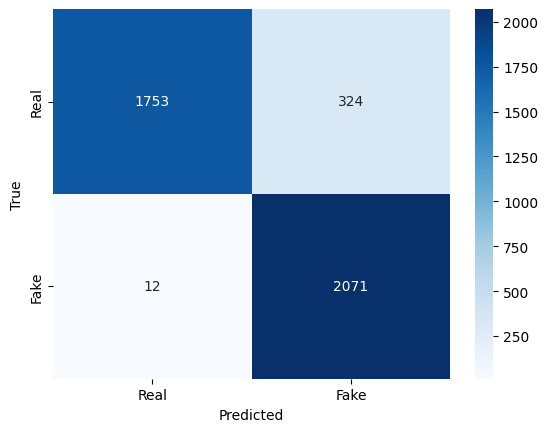

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix for the test set
cm = confusion_matrix(Y_test, Y_test_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [43]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train_balanced, Y_train_balanced, cv=5, scoring='accuracy')
print("Cross-validation accuracy scores:", scores)
print("Mean cross-validation score:", scores.mean())


Cross-validation accuracy scores: [0.92557023 0.92076831 0.92587035 0.91956783 0.92857143]
Mean cross-validation score: 0.9240696278511406


In [38]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the model
rf_model.fit(X_train_balanced, Y_train_balanced)

# Make predictions
Y_train_pred_rf = rf_model.predict(X_train_balanced)
Y_test_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Model Evaluation:")
print("\nTraining Set Evaluation:")
print(f"Accuracy: {accuracy_score(Y_train_balanced, Y_train_pred_rf)}")
print(f"Precision: {precision_score(Y_train_balanced, Y_train_pred_rf)}")
print(f"Recall: {recall_score(Y_train_balanced, Y_train_pred_rf)}")
print(f"F1-Score: {f1_score(Y_train_balanced, Y_train_pred_rf)}")

print("\nTest Set Evaluation:")
print(f"Accuracy: {accuracy_score(Y_test, Y_test_pred_rf)}")
print(f"Precision: {precision_score(Y_test, Y_test_pred_rf)}")
print(f"Recall: {recall_score(Y_test, Y_test_pred_rf)}")
print(f"F1-Score: {f1_score(Y_test, Y_test_pred_rf)}")



Random Forest Model Evaluation:

Training Set Evaluation:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

Test Set Evaluation:
Accuracy: 0.9786057692307693
Precision: 0.968075117370892
Recall: 0.9899183869419107
F1-Score: 0.9788749109897935


In [39]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(kernel='linear', class_weight='balanced', random_state=42)

# Train the model
svm_model.fit(X_train_balanced, Y_train_balanced)

# Make predictions
Y_train_pred_svm = svm_model.predict(X_train_balanced)
Y_test_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("SVM Model Evaluation:")
print("\nTraining Set Evaluation:")
print(f"Accuracy: {accuracy_score(Y_train_balanced, Y_train_pred_svm)}")
print(f"Precision: {precision_score(Y_train_balanced, Y_train_pred_svm)}")
print(f"Recall: {recall_score(Y_train_balanced, Y_train_pred_svm)}")
print(f"F1-Score: {f1_score(Y_train_balanced, Y_train_pred_svm)}")

print("\nTest Set Evaluation:")
print(f"Accuracy: {accuracy_score(Y_test, Y_test_pred_svm)}")
print(f"Precision: {precision_score(Y_test, Y_test_pred_svm)}")
print(f"Recall: {recall_score(Y_test, Y_test_pred_svm)}")
print(f"F1-Score: {f1_score(Y_test, Y_test_pred_svm)}")


SVM Model Evaluation:

Training Set Evaluation:
Accuracy: 0.9896158463385354
Precision: 0.9875672444710102
Recall: 0.9917166866746698
F1-Score: 0.9896376160527104

Test Set Evaluation:
Accuracy: 0.9745192307692307
Precision: 0.967818267865594
Recall: 0.9817570811329813
F1-Score: 0.9747378455672069


ACCURACY

In [52]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train_balanced, Y_train_balanced)

# Print the best parameters
print("Best Hyperparameters for Random Forest:", grid_search.best_params_)

# Use the best estimator to make predictions
best_rf_model = grid_search.best_estimator_


Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 300}


In [53]:
importances = best_rf_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

for idx in sorted_indices[:10]:  # Display top 10 important features
    print(f"Feature: {idx}, Importance: {importances[idx]}")


Feature: 527, Importance: 0.15173895558264294
Feature: 2993, Importance: 0.09177594930725225
Feature: 4980, Importance: 0.09153405627165201
Feature: 4977, Importance: 0.08768217872850848
Feature: 2979, Importance: 0.08125748140145979
Feature: 4466, Importance: 0.07369976602664889
Feature: 2293, Importance: 0.013615454469408587
Feature: 3204, Importance: 0.010591779410470379
Feature: 2319, Importance: 0.010528866987081846
Feature: 706, Importance: 0.009141059466712393


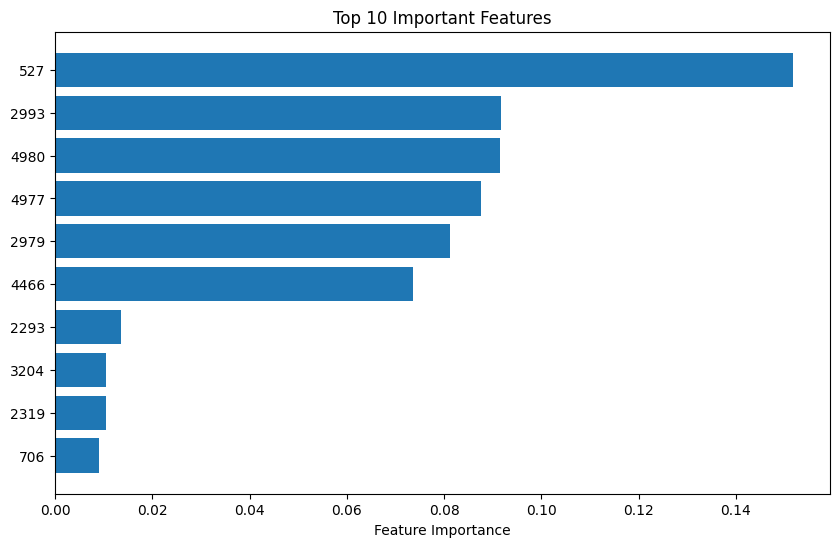

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importance plot
indices = np.argsort(importances)[::-1][:10]  # Top 10 features
plt.figure(figsize=(10, 6))
plt.title("Top 10 Important Features")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), indices)
plt.xlabel("Feature Importance")
plt.gca().invert_yaxis()
plt.show()


In [64]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Y_pred = best_rf_model.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))


Accuracy: 0.9817307692307692
Confusion Matrix:
 [[2027   50]
 [  26 2057]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      2077
           1       0.98      0.99      0.98      2083

    accuracy                           0.98      4160
   macro avg       0.98      0.98      0.98      4160
weighted avg       0.98      0.98      0.98      4160



In [65]:
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(best_rf_model, X, Y, cv=5)  # 5-fold cross-validation
print("Cross-validation accuracy:", cross_val_scores.mean())


Cross-validation accuracy: 0.9802403846153845


In [66]:
import numpy as np
print(f"Mean CV Accuracy: {cross_val_scores.mean():.4f}")
print(f"CV Standard Deviation: {cross_val_scores.std():.4f}")


Mean CV Accuracy: 0.9802
CV Standard Deviation: 0.0023


In [67]:
# Sample new input for prediction (make sure it's in the same format as your training data)
new_news_sample = ["Heavy Israeli airstrikes rocked Beirut overnight while Gaza officials say 21 people were killed in a strike on a mosque"]

# Preprocess this input (tokenization, vectorization, etc.)
# Assuming you have already done this preprocessing on X_test
new_news_preprocessed = vectorizer.transform(new_news_sample)

# Predict using the trained model
predicted_label = model.predict(new_news_preprocessed)

# Mapping the predicted label (0 or 1) to 'Real' or 'Fake'
news_category = {0: 'Real', 1: 'Fake'}
result = news_category[predicted_label[0]]

print(f"The predicted category for the news is: {result}")


The predicted category for the news is: Fake


In [68]:
# Predicting the categories for the test set
test_predictions = model.predict(X_test)

# Mapping predictions to 'Real' or 'Fake'
predicted_categories = ['Real' if label == 0 else 'Fake' for label in test_predictions]

# Print out predictions for the test set
for idx, prediction in enumerate(predicted_categories[:10]):  # Displaying first 10 predictions
    print(f"Test news {idx + 1}: Predicted as {prediction}")


Test news 1: Predicted as Fake
Test news 2: Predicted as Real
Test news 3: Predicted as Fake
Test news 4: Predicted as Fake
Test news 5: Predicted as Real
Test news 6: Predicted as Real
Test news 7: Predicted as Real
Test news 8: Predicted as Real
Test news 9: Predicted as Fake
Test news 10: Predicted as Real


In [55]:
from sklearn.metrics import accuracy_score
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [56]:
print(f'The accuracy od the training data: {training_data_accuracy}')

The accuracy od the training data: 0.9277043269230769


In [57]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [58]:
print(f'The accuracy od the training data: {test_data_accuracy}')

The accuracy od the training data: 0.9189903846153846


# Predicyive System


In [59]:
X_new = X_test[0]
prediction = model.predict(X_new)
print(prediction)

if(prediction[0] ==0):
    print('The news is Real')
else:
    print('The news is Fake')

[1]
The news is Fake


In [60]:
print(Y_test[0])

0


In [61]:
X_new = X_test[1]
prediction = model.predict(X_new)
print(prediction)

if(prediction[0] ==0):
    print('The news is Real')
else:
    print('The news is Fake')

[0]
The news is Real


In [62]:
print(Y_test[1])

0


In [50]:
import pickle
with open('model1.pkl', 'wb') as file:
    pickle.dump(model, file)

In [51]:
with open('vectorizer1.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)